In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob
import re


In [41]:
df = pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/treatment_results.csv')
df

,Generation,AvgAlphaPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.5007,12,20,20,4,4,1
1,1,0.5006,17,23,26,3,6,2
2,2,0.5002,22,29,41,4,6,2
3,3,0.5001,24,37,66,2,4,8
4,4,0.5001,31,44,102,1,6,10
5,5,0.5001,50,60,128,4,9,7
6,6,0.4999,69,96,171,4,14,9
7,7,0.4999,99,137,220,7,10,17
8,8,0.4994,113,164,344,11,9,19
9,9,0.4993,157,254,483,9,9,26


Text(0, 0.5, 'Prey Population')

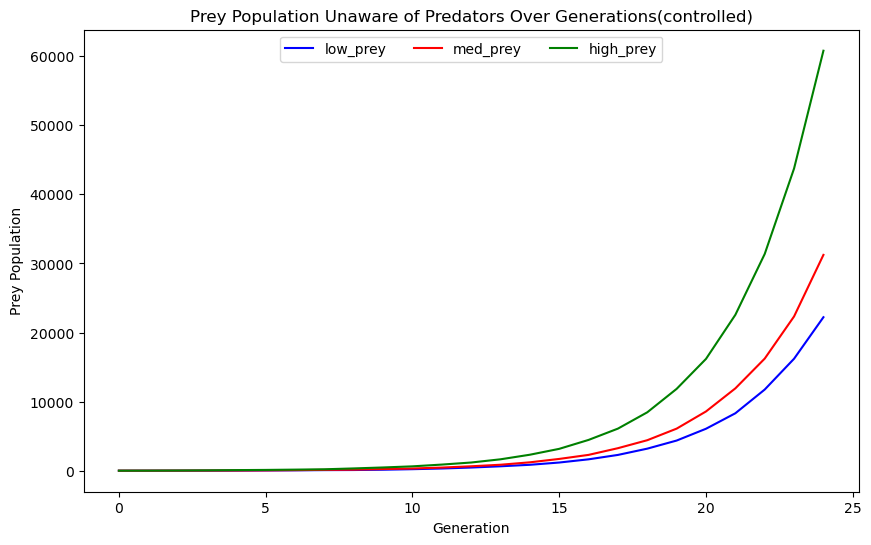

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df['Generation'], df['PreyLow'], label='low_prey', color='blue')
plt.plot(df['Generation'], df['PreyMed'], label='med_prey', color='red')
plt.plot(df['Generation'], df['PreyHigh'], label='high_prey', color='green')
plt.legend(ncols=3, loc='upper center')
plt.title('Prey Population Unaware of Predators Over Generations(controlled)')
plt.xlabel('Generation')
plt.ylabel('Prey Population')

In [43]:
kp1= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.02.csv')
kp1

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.500000,1.000000,10,7,30,3,8,18
1,1,0.500119,1.000000,5,6,58,4,7,25
2,2,0.500149,0.999972,5,5,93,9,10,28
3,3,0.500187,0.999708,3,11,164,11,13,33
4,4,0.500437,0.999335,1,19,274,13,18,44
5,5,0.500359,0.999175,7,38,471,14,25,47
6,6,0.500405,0.999014,10,79,771,14,31,60
7,7,0.500244,0.998650,20,136,1249,25,27,74
8,8,0.500116,0.998514,30,199,2094,36,24,92
9,9,0.500160,0.998464,48,307,3421,40,33,111


In [44]:
kp2= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.04.csv')
kp2

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.500000,0.999032,6,8,35,6,10,10
1,1,0.499780,0.998812,5,3,76,6,9,21
2,2,0.499791,0.998171,4,6,120,8,12,23
3,3,0.500182,0.997975,4,15,204,10,9,30
4,4,0.500027,0.998114,11,28,320,16,11,33
5,5,0.500051,0.998205,12,61,514,19,11,43
6,6,0.500015,0.997996,17,97,873,21,14,51
7,7,0.499790,0.997635,23,137,1445,15,20,60
8,8,0.499787,0.997312,46,217,2335,22,18,70
9,9,0.499675,0.997154,81,355,3831,29,23,85


In [45]:
kp3= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.06.csv')
kp3

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.499715,0.999328,7,9,35,4,5,15
1,1,0.499486,0.999126,3,13,69,6,6,17
2,2,0.499876,0.999395,1,12,121,4,7,22
3,3,0.499695,0.998984,2,18,211,4,6,27
4,4,0.499300,0.998974,5,31,337,15,4,21
5,5,0.498957,0.999052,5,45,561,12,3,30
6,6,0.499031,0.998755,7,68,956,11,3,39
7,7,0.498973,0.998496,26,116,1539,11,6,42
8,8,0.498973,0.998299,51,203,2513,16,7,44
9,9,0.498859,0.998123,83,310,4182,17,7,48


In [46]:
kp4= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.08.csv')
kp4

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.499083,1.000000,10,5,36,5,7,9
1,1,0.499401,1.000000,10,10,58,3,5,18
2,2,0.499010,1.000000,6,6,109,7,4,18
3,3,0.499408,0.999852,4,11,182,3,3,26
4,4,0.499601,0.999719,5,29,290,5,4,31
5,5,0.499265,0.999579,12,35,495,5,7,32
6,6,0.499047,0.999447,16,56,833,9,5,41
7,7,0.499438,0.999154,26,138,1362,13,8,43
8,8,0.499499,0.998945,37,223,2193,20,11,41
9,9,0.499559,0.998731,56,329,3711,16,9,47


In [47]:
kp5= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.12.csv')
kp5

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.499913,0.999565,7,13,43,10,4,8
1,1,0.499437,0.999607,5,11,85,9,2,13
2,2,0.499350,0.999308,3,14,144,6,6,12
3,3,0.499863,0.999068,4,21,235,7,4,18
4,4,0.499594,0.998930,5,33,403,10,3,22
5,5,0.499956,0.998451,6,64,641,10,1,25
6,6,0.499739,0.998455,20,105,1055,15,1,23
7,7,0.499584,0.998082,43,159,1715,16,4,20
8,8,0.499668,0.997947,63,216,2865,16,5,24
9,9,0.499730,0.997719,87,372,4808,13,9,27


In [48]:
kp6= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.14.csv')
kp6

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.500000,1.000000,10,3,37,7,4,11
1,1,0.499824,1.000000,1,7,65,8,1,13
2,2,0.499846,0.999605,4,7,110,7,3,11
3,3,0.499917,0.999155,1,11,190,8,2,12
4,4,0.499820,0.999046,8,19,313,7,1,15
5,5,0.500173,0.998969,8,36,538,5,2,19
6,6,0.500228,0.998748,9,62,886,7,4,14
7,7,0.500401,0.998572,23,96,1486,5,8,15
8,8,0.500257,0.998343,38,160,2496,3,11,15
9,9,0.500265,0.998107,47,280,4194,4,8,22


In [49]:
kp6= pd.read_csv('/Users/aviannceeuwing/final-project-euwing/Data/ideal_shift_kp_0.1.csv')
kp6

,Generation,AvgAlphaPrey,AvgTauPrey,PreyLow,PreyMed,PreyHigh,PredLow,PredMed,PredHigh
0,0,0.500000,0.999829,10,7,31,3,5,15
1,1,0.500000,0.999874,6,9,50,3,9,16
2,2,0.500211,0.999528,5,14,84,5,9,21
3,3,0.499785,0.999453,6,12,145,12,8,22
4,4,0.500160,0.999539,4,20,239,13,6,27
5,5,0.499923,0.999445,9,24,403,11,10,36
6,6,0.499564,0.999452,13,50,662,15,11,33
7,7,0.499696,0.999262,10,74,1108,16,11,37
8,8,0.499651,0.999153,22,146,1822,13,15,45
9,9,0.499554,0.999000,52,256,2949,23,17,38


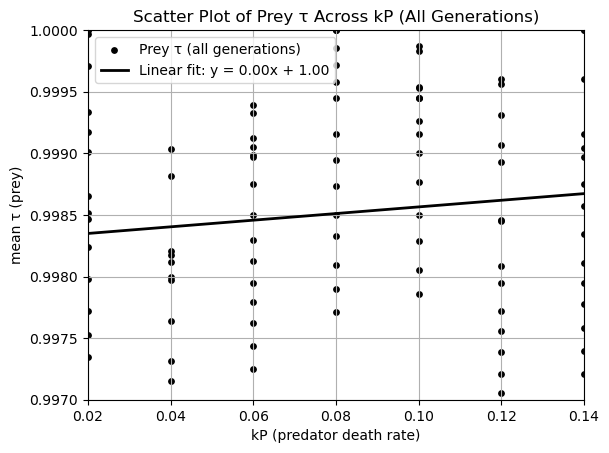

In [50]:

csv_dir = '/Users/aviannceeuwing/final-project-euwing/Data'
csv_files = sorted(glob.glob(os.path.join(csv_dir, 'ideal_shift_kp_*.csv')))

kp_values = []
prey_tau_points = []

# Loop through each CSV file and extract the kp value and prey_tau points
for file in csv_files:
    df2 = pd.read_csv(file)
    if "AvgTauPrey" in df2.columns:
        prey_tau_points += list (df2["AvgTauPrey"])
        kp_val = float(file.split("_kp_")[1].replace(".csv", ""))
        kp_values += [kp_val]*len(df2)

# Scatter plot
plt.scatter(kp_values, prey_tau_points, color='black', s=15, marker='o', label='Prey τ (all generations)')

# Fit a linear regression line
z = np.polyfit(kp_values, prey_tau_points, 1)  # degree 1 = linear
p = np.poly1d(z)
x_line = np.linspace(min(kp_values), max(kp_values), 100)
plt.plot(x_line, p(x_line), "k-", linewidth=2, label=f"Linear fit: y = {z[0]:.2f}x + {z[1]:.2f}")

# Labels and styling
plt.xlabel("kP (predator death rate)")
plt.ylabel("mean τ (prey)")
plt.title("Scatter Plot of Prey τ Across kP (All Generations)")
plt.grid(True)
plt.ylim(.997, 1)
plt.xlim(0.02, 0.14)
plt.legend()
plt.show()

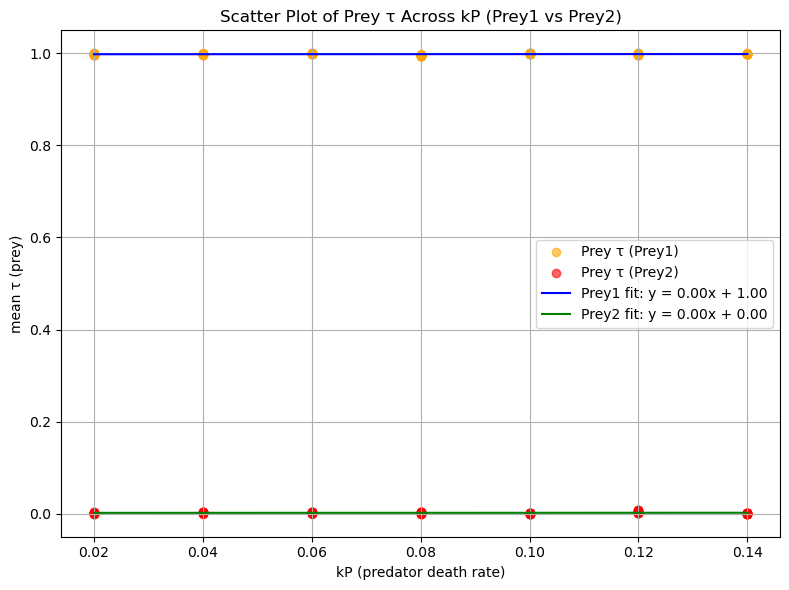

In [51]:

csv_dir = '/Users/aviannceeuwing/final-project-euwing/Data'
file_paths = sorted(glob.glob(os.path.join(csv_dir, 'Prey2_kp_*.csv')))

# Lists to store all data points
kp_values = []
prey1_tau = []
prey2_tau = []

# Extract data from each file
for path in file_paths:
    # Get kP value from filename
    kp = float(path.split("_kp_")[1].replace(".csv", ""))
    df = pd.read_csv(path)

    # For each generation, save the kP, Tau1 (Prey1), Tau2 (Prey2)
    for _, row in df.iterrows():
        kp_values.append(kp)
        prey1_tau.append(row["Tau1"])
        prey2_tau.append(row["Tau2"])

# Convert to numpy arrays for math operations
kp_values = np.array(kp_values)
prey1_tau = np.array(prey1_tau)
prey2_tau = np.array(prey2_tau)

# Linear regression (1st-degree polynomial fit)
fit1 = np.polyfit(kp_values, prey1_tau, 1)
fit2 = np.polyfit(kp_values, prey2_tau, 1)

# Create line functions
line1 = np.poly1d(fit1)
line2 = np.poly1d(fit2)

# Generate smooth x-values for the lines
x_vals = np.linspace(min(kp_values), max(kp_values), 200)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(kp_values, prey1_tau, color='orange', alpha=0.6, label="Prey τ (Prey1)")
plt.scatter(kp_values, prey2_tau, color='red', alpha=0.6, label="Prey τ (Prey2)")
plt.plot(x_vals, line1(x_vals), color='blue', label=f"Prey1 fit: y = {fit1[0]:.2f}x + {fit1[1]:.2f}")
plt.plot(x_vals, line2(x_vals), color='green', label=f"Prey2 fit: y = {fit2[0]:.2f}x + {fit2[1]:.2f}")

# Axis labels and title
plt.xlabel("kP (predator death rate)")
plt.ylabel("mean τ (prey)")
plt.title("Scatter Plot of Prey τ Across kP (Prey1 vs Prey2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

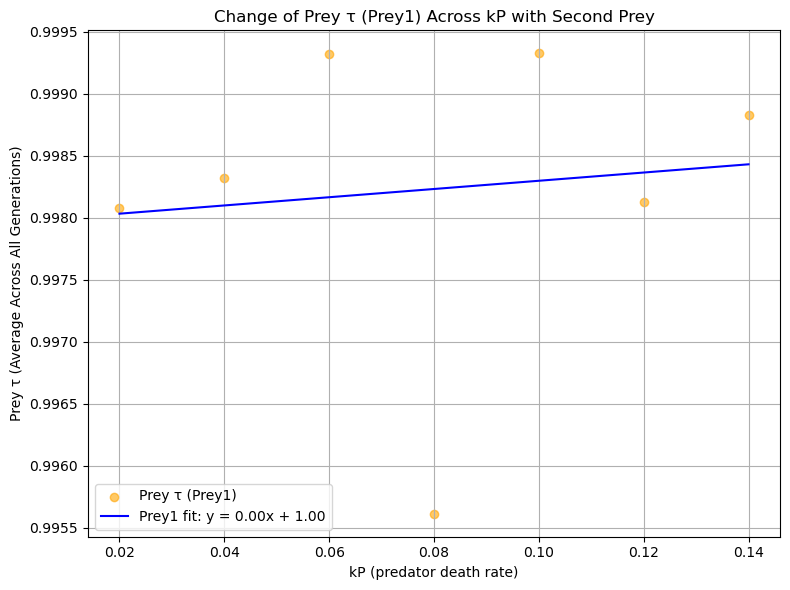

In [52]:
# Get all CSV files matching the pattern (assuming they are in the current directory as uploaded)
file_pattern = 'Data/Prey2_kp_*.csv'
csv_files = glob.glob(file_pattern)

if not csv_files:
    print(f"No CSV files found matching the pattern '{file_pattern}'. Please ensure the files are in the correct directory.")
else:
    # Initialize lists to store data
    kp_values = []
    prey1_tau = []  # From 'Tau1' column

    # Loop through each file, extract kP, and calculate Prey tau for Prey1
    for file in csv_files:
        # Extract kP value from the filename
        match = re.search(r'kp_(\d+\.\d+)\.csv', file)
        if match:
            kp = float(match.group(1))
            kp_values.append(kp)

            # Read the CSV file
            df = pd.read_csv(file)

            # Calculate Prey tau for Prey1 (Tau1) as the mean across all generations
            prey1_tau.append(df['Tau1'].mean())
        else:
            print(f"Warning: Could not extract kP from filename: {file}. Skipping this file.")

    if not kp_values:
        print("No valid kP values extracted from the filenames. Cannot generate plot.")
    else:
        # Convert lists to numpy arrays for plotting and regression
        kp_values = np.array(kp_values)
        prey1_tau = np.array(prey1_tau)

        # Sort the values based on kp_values for proper plotting
        sort_indices = np.argsort(kp_values)
        kp_values = kp_values[sort_indices]
        prey1_tau = prey1_tau[sort_indices]

        # Perform linear regression for Prey1
        fit1 = np.polyfit(kp_values, prey1_tau, 1)

        # Create line function for Prey1
        line1 = np.poly1d(fit1)

        # Generate smooth x-values for the line
        x_vals = np.linspace(min(kp_values), max(kp_values), 200)

        # Create the plot
        plt.figure(figsize=(8, 6))
        plt.scatter(kp_values, prey1_tau, color='orange', alpha=0.6, label="Prey τ (Prey1)")
        plt.plot(x_vals, line1(x_vals), color='blue', label=f"Prey1 fit: y = {fit1[0]:.2f}x + {fit1[1]:.2f}")

        # Axis labels and title
        plt.xlabel("kP (predator death rate)")
        plt.ylabel("Prey τ (Average Across All Generations)") # Updated label
        plt.title("Change of Prey τ (Prey1) Across kP with Second Prey")
        plt.legend()
        plt.grid(True)
        plt.tight_layout() # Adjust layout to prevent labels from overlapping

        # Save the plot
        plot_filename = 'Prey1_tau_change_across_kP_avg_generations_with_second_Prey.png'
        plt.savefig(plot_filename)
        plt.show()
